In [62]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
languages = ["arabic","chinese","english","french","russian","spanish"]
metrics = ["editors","absolute-bytes","edited-page","edits","netbytediff","newpages"]

user_dataset = []
anon_dataset = []
for lan in languages:
    user_lan_dataset = []
    anon_lan_dataset = []
    for met in metrics:
        file_name = lan+"-"+met+".csv"

        data = pd.read_csv("./data/"+file_name)
        user_data = data["total.user"].to_list()
        anon_data = data["total.anonymous"].to_list()
        user_lan_dataset.append(user_data)
        anon_lan_dataset.append(anon_data)
    user_dataset.append(user_lan_dataset)
    anon_dataset.append(anon_lan_dataset)

In [79]:
def regression(metric, x, y, axs, i, j):
    colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']
    
    user_editors_normalized = (x - np.min(x)) / np.ptp(x)
    metric_user_values_normalized = (y - np.min(y)) / np.ptp(y)

    # Linear regression
    coefficients = np.polyfit(user_editors_normalized, metric_user_values_normalized, 1)
    m = coefficients[0] 
    b = coefficients[1] 
    predicted_y = m * user_editors_normalized + b
    residuals = predicted_y - metric_user_values_normalized
    rmse1 = np.sqrt(np.mean(residuals**2))

    # Quardratic regression 
    coefficients2 = np.polyfit(user_editors_normalized, metric_user_values_normalized, 2)
    a2 = coefficients2[0] 
    b2 = coefficients2[1] 
    c2 = coefficients2[2] 
    predicted_y = a2 * user_editors_normalized ** 2 + b2 * user_editors_normalized + c2
    residuals = predicted_y - metric_user_values_normalized
    rmse2 = np.sqrt(np.mean(residuals**2))

    # 3rd degree 
    coefficients3 = np.polyfit(user_editors_normalized, metric_user_values_normalized, 3)
    a3 = coefficients3[0] 
    b3 = coefficients3[1] 
    c3 = coefficients3[2] 
    d3 = coefficients3[3] 
    predicted_y = a3 * user_editors_normalized ** 3 + b3 * user_editors_normalized ** 2 + c3 * user_editors_normalized + d3
    residuals = predicted_y - metric_user_values_normalized
    rmse3 = np.sqrt(np.mean(residuals**2))

    x_values = np.linspace(min(user_editors_normalized), max(user_editors_normalized), 58)
    if (rmse1 == min(rmse1, rmse2, rmse3)):
        print(rmse1)
        y_values = np.polyval(coefficients, x_values)
        axs[j-1].plot(x_values, y_values, color=colors[i-1], label=lan + "-" + metric + "-deg1")
    elif (rmse2 == min(rmse1, rmse2, rmse3)):
        print(rmse2)
        y_values = np.polyval(coefficients2, x_values)
        axs[j-1].plot(x_values, y_values, color=colors[i-1], label=lan + "-" + metric + "-deg2")
    else:
        print(rmse3)
        y_values = np.polyval(coefficients3, x_values)
        axs[j-1].plot(x_values, y_values, color=colors[i-1], label=lan + "-" + metric + "-deg3")

    axs[j-1].legend()
    axs[j-1].set_title(lan + " " + metric + " for users")
    axs[j-1].set_xlabel(lan)
    axs[j-1].set_ylabel(metric)
        

0.15584408692078813
0.16079329774739598
0.19255927550455634
0.17475781608734223
0.22845363202811525
0.1824395188574553
0.14053729513110094
0.1664365209871257
0.18792310089814804
0.19781439548191326
0.1411584330069271
0.13088530235694404
0.14145171277896748
0.14560713108553555
0.14697982202350565
0.17623156038045007
0.13824583404707766
0.13141090309547848
0.1569047550949813
0.1476401266525641
0.11316148772764792
0.16216014920324193
0.22083239942890676
0.14985020046230876
0.18879765350526082
0.18868028616257393
0.17807183720774455
0.2282741110630128
0.14474373340288357
0.19002734099019641
0.14168443296913183
0.17102851795298912
0.1702447614315867
0.11100413570503008
0.12498342639717157
0.1514059099132615
0.16131273389051298
0.18780282814770435
0.1564337307571737
0.14990040154449416
0.1794177030339503
0.1626961948812107
0.2131168347359017
0.10624860409421343
0.1476598146834097
0.10524611239259443
0.17755249711405907
0.2443048696278226
0.25665216193829454
0.20318670218680746
0.200166684866

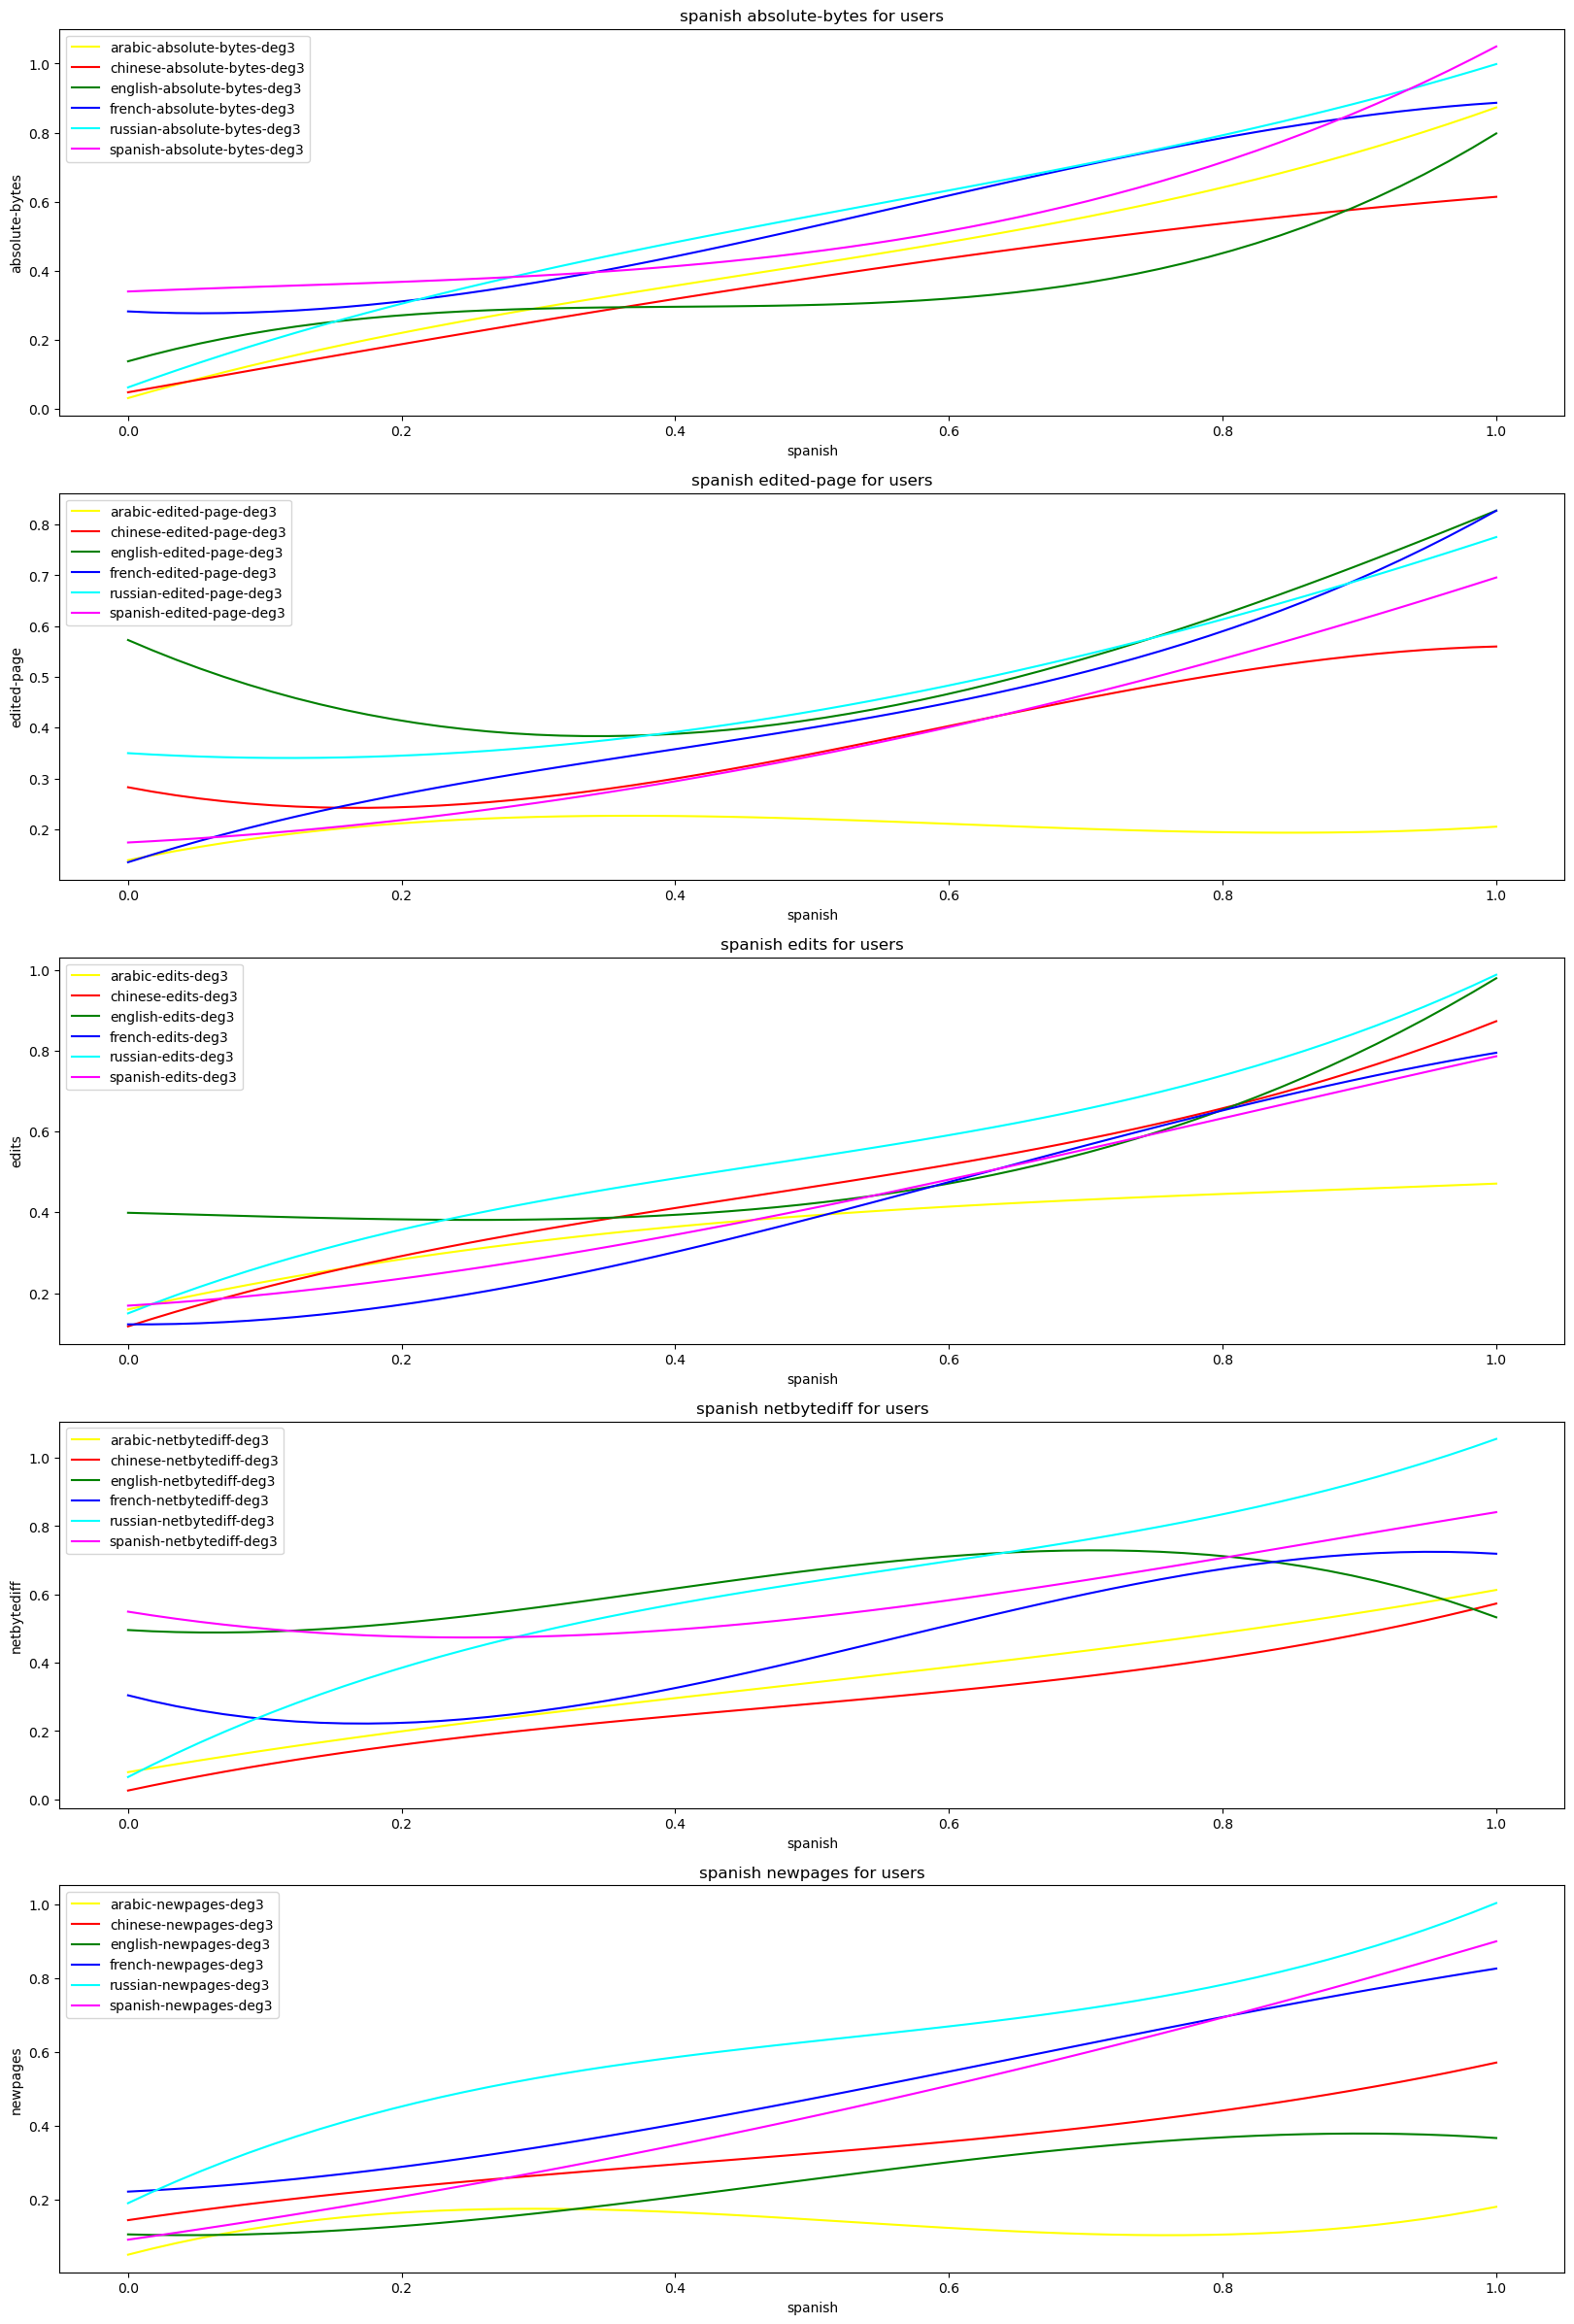

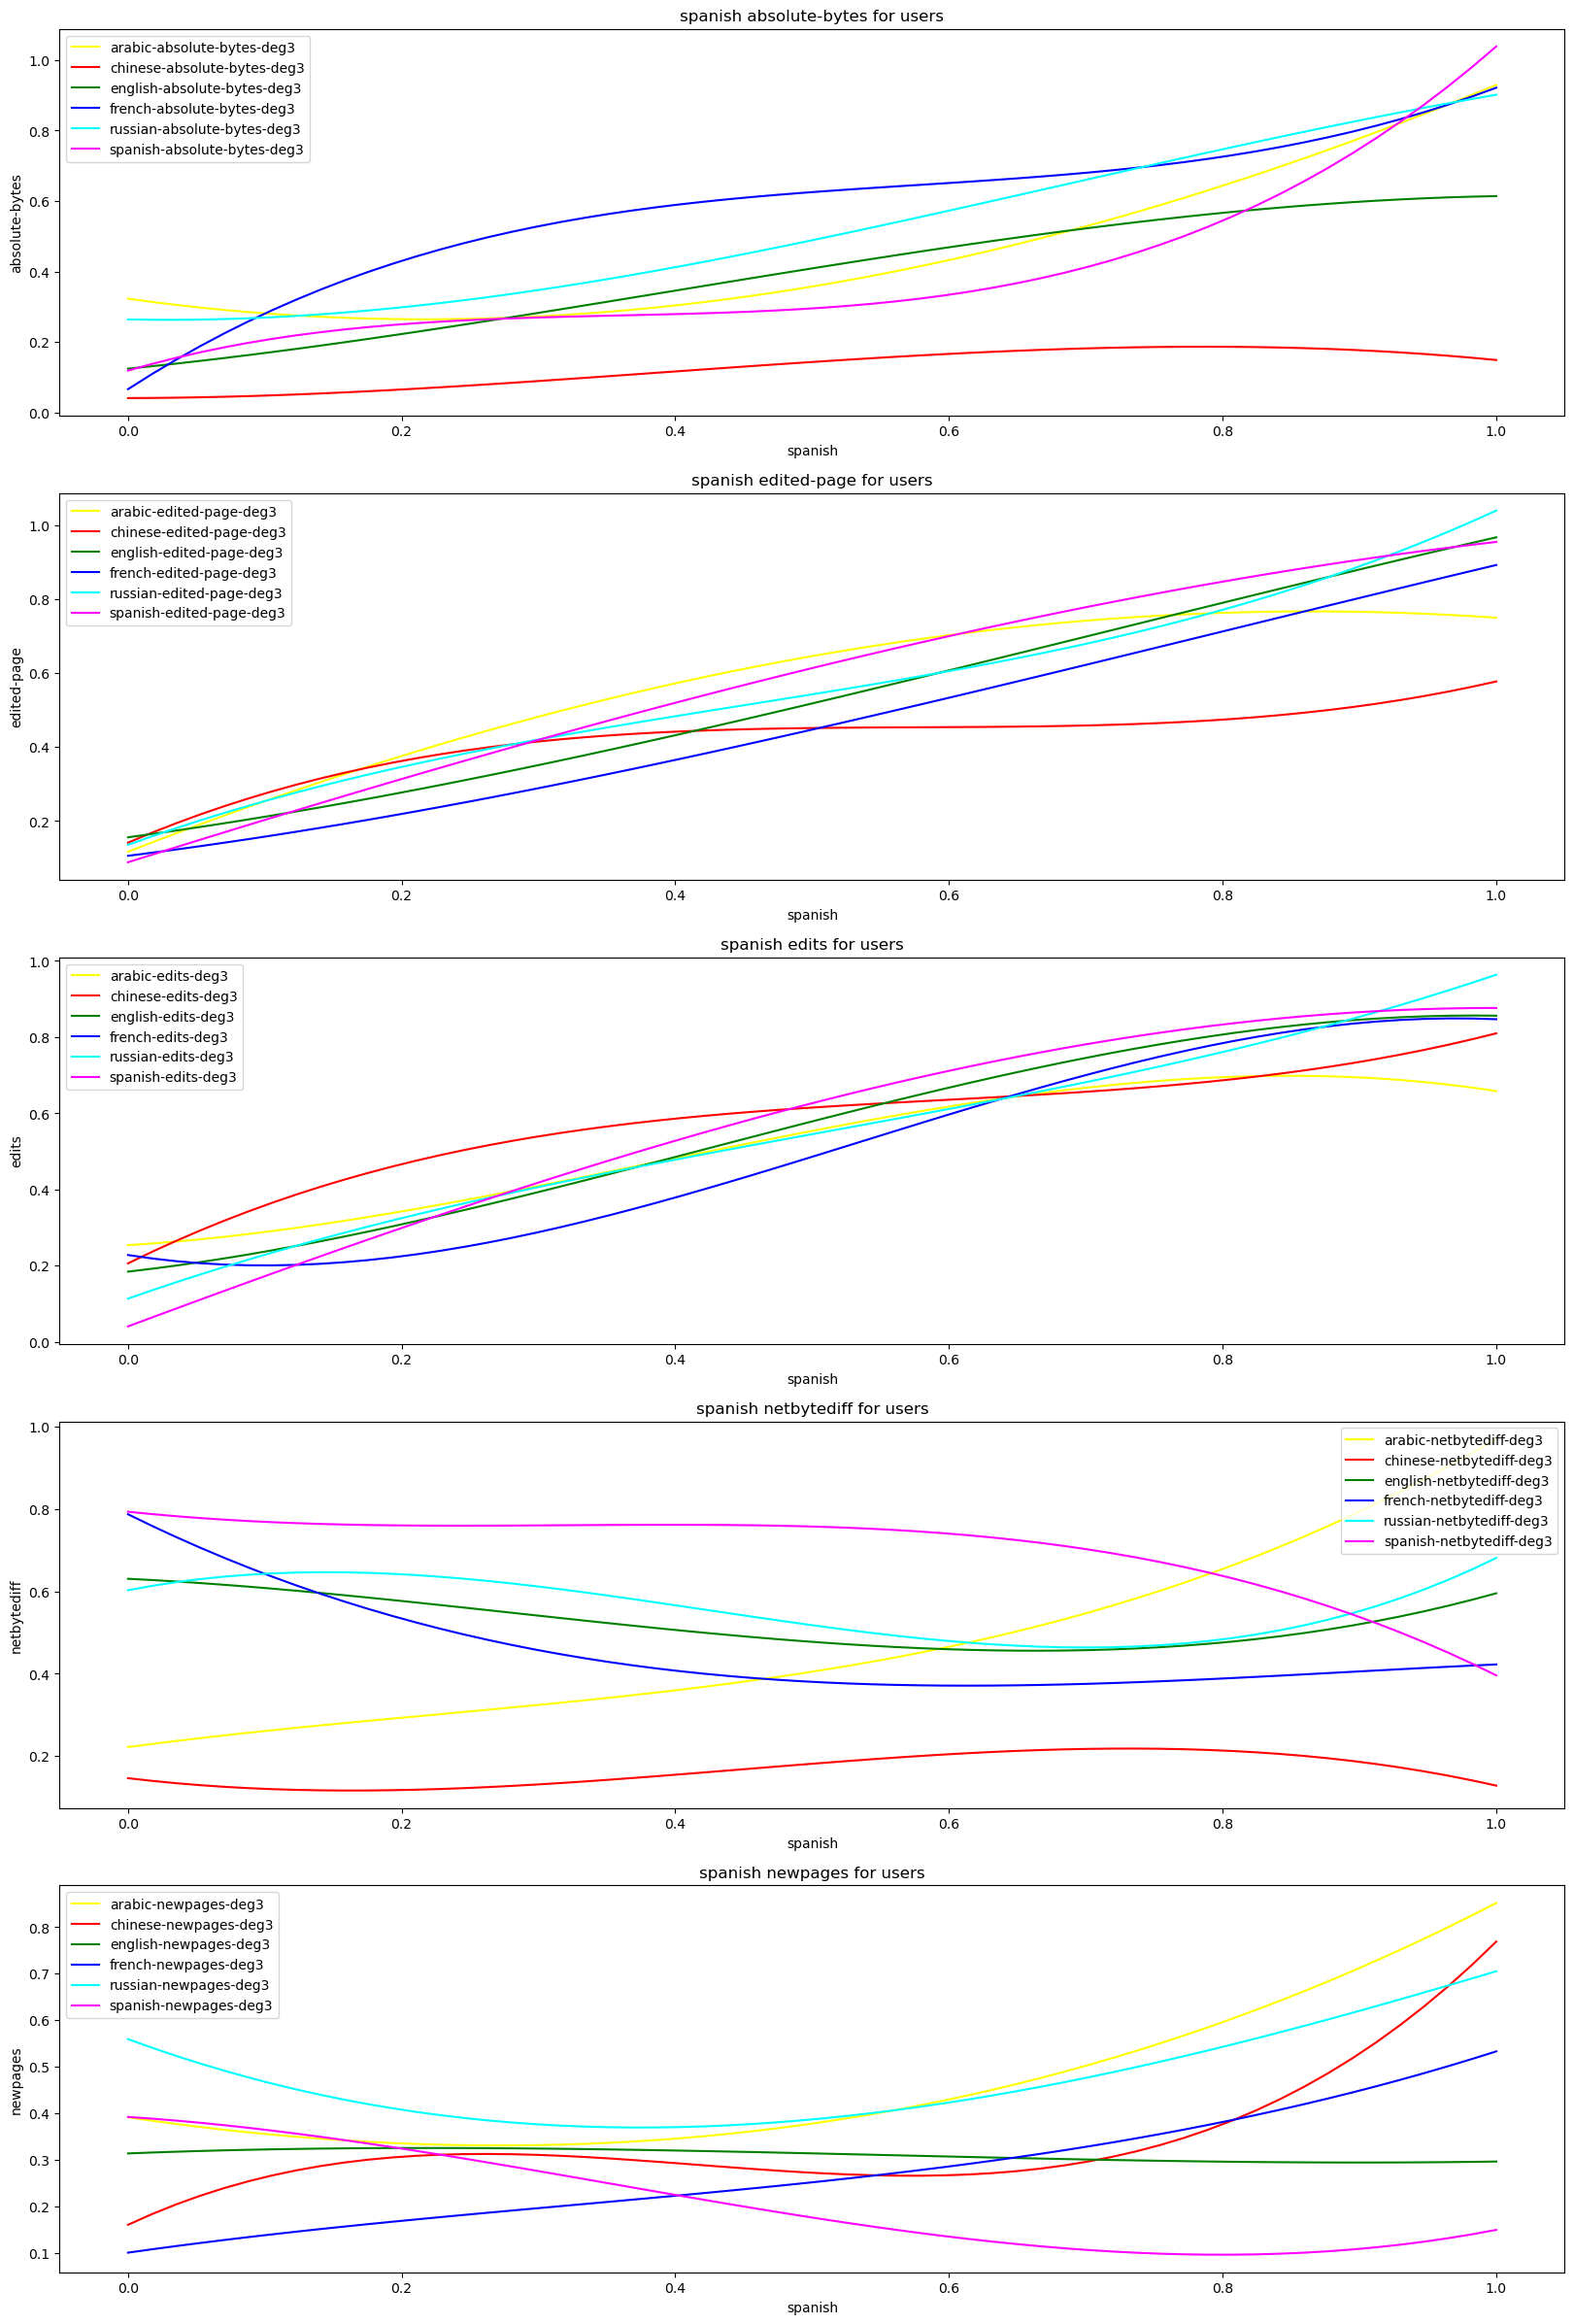

In [80]:
fig, axs = plt.subplots(5, 1, figsize=(20, 30))
fig1, axs1 = plt.subplots(5, 1, figsize=(20, 30))

for i in range(len(user_dataset)):
    lan = languages[i]
    user_lan_dataset = user_dataset[i]
    anon_lan_dataset = anon_dataset[i]
    
    #number of editors
    user_editors = user_lan_dataset[0]
    anon_editors = anon_lan_dataset[0]
    pcc_user = []
    pp_user = []
    pcc_anon = []
    pp_anon = []

    for j in range(1, len(user_dataset)):
        metric = metrics[j]
        metric_user_values = user_lan_dataset[j]
        metric_anon_values = anon_lan_dataset[j]

        # plt.scatter(user_editors, metric_user_values, color='blue', marker='o')
        regression(metric, user_editors, metric_user_values, axs, i, j)

        regression(metric, user_editors, metric_anon_values, axs1, i, j)

        correlation_user, p_value_user = pearsonr(user_editors, metric_user_values)
        pcc_user.append(correlation_user)
        pp_user.append(p_value_user)

        correlation_anon, p_value_anon = pearsonr(anon_editors, metric_anon_values)
        pcc_anon.append(correlation_anon)
        pp_anon.append(p_value_anon)

fig.savefig('graphs/regression-user.png')
fig1.savefig('graphs/regression-anon.png')

    # csv_file = 'stats/pearson-cc-user.csv'
    # with open(csv_file, 'a', newline='') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(pcc_user)

    # csv_file = 'stats/pearson-p-user.csv'
    # with open(csv_file, 'a', newline='') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(pp_user)

    # csv_file = 'stats/pearson-cc-anon.csv'
    # with open(csv_file, 'a', newline='') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(pcc_anon)

    # csv_file = 'stats/pearson-p-anon.csv'
    # with open(csv_file, 'a', newline='') as file:
    #     writer = csv.writer(file)
    #     writer.writerow(pp_anon)

In [84]:
def plot(file_name,title,color="viridis"):
    pcc_users = pd.read_csv("stats/" + file_name + ".csv", header = None)

    sns.heatmap(pcc_users, 
                xticklabels=metrics[1:], 
                yticklabels=languages, 
                cmap=color, 
                vmax=1,
                vmin=-1,
                annot=True, 
                fmt=".2f")

    plt.title(title)
    plt.savefig('graphs/'+file_name)
    plt.show()

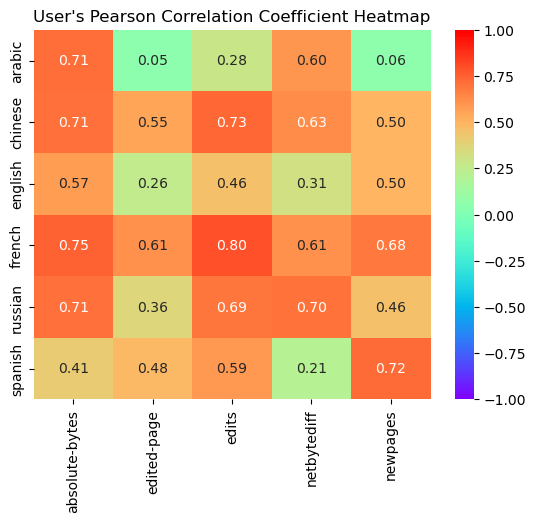

In [86]:
title = "User's Pearson Correlation Coefficient Heatmap"
plot("pearson-cc-user",title,"rainbow")

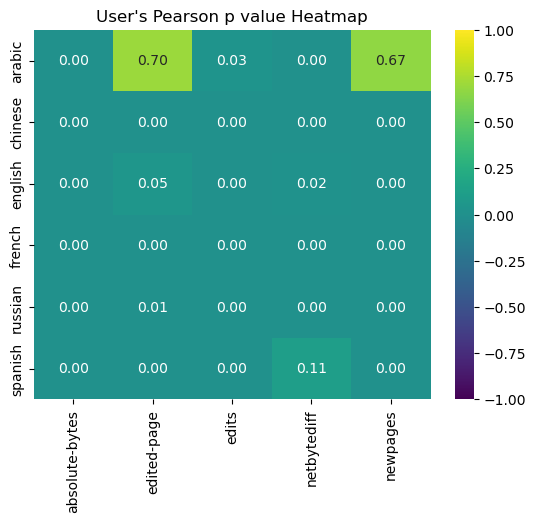

In [87]:
title = "User's Pearson p value Heatmap"
plot("pearson-p-user",title)

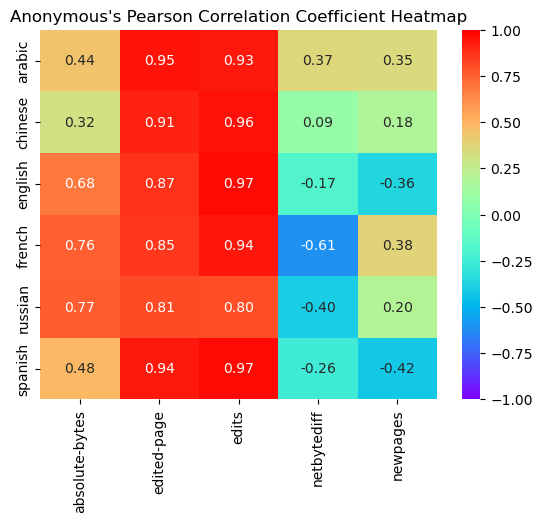

In [88]:
title = "Anonymous's Pearson Correlation Coefficient Heatmap"
plot("pearson-cc-anon",title,"rainbow")

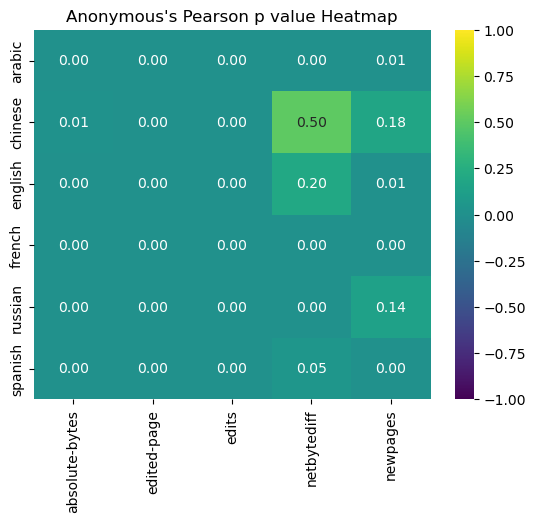

In [89]:
title = "Anonymous's Pearson p value Heatmap"
plot("pearson-p-anon",title)

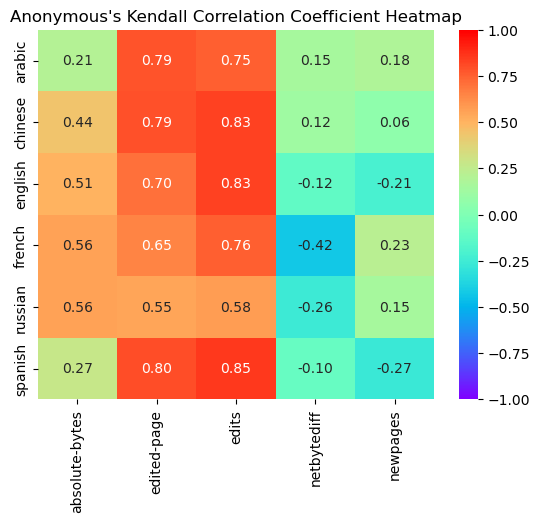

In [90]:
title = "Anonymous's Kendall Correlation Coefficient Heatmap"
plot("kendall-cc-anon",title,"rainbow")

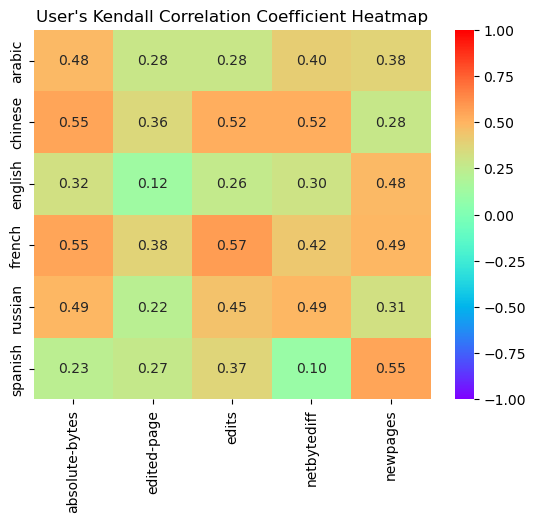

In [91]:
title = "User's Kendall Correlation Coefficient Heatmap"
plot("kendall-cc-user",title,"rainbow")

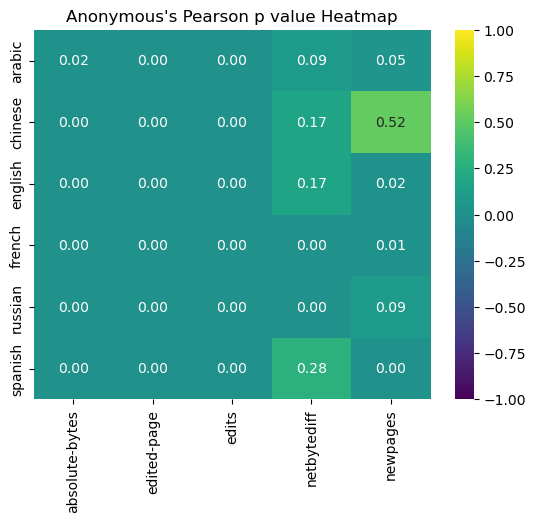

In [92]:
title = "Anonymous's Pearson p value Heatmap"
plot("kendall-p-anon", title)

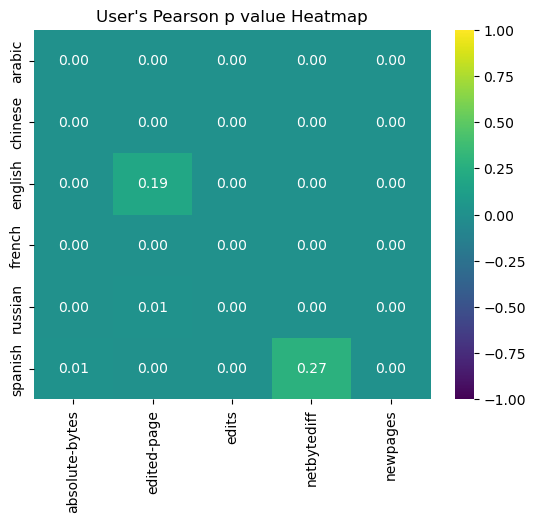

In [93]:
title = "User's Pearson p value Heatmap"
plot("kendall-p-user", title)